<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/Bag_of_Words%2CTF-IDF%2Cn-gram_TEST_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#MODEL IMPORTS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#VALIDATION METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

# DATA PREPARATION AND CLEANING 

In [37]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 100):
        partitions.append((words[i:i+100], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of the same genre 'novel'
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 100 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [38]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [39]:
data=pd.read_csv('book_partitions.csv')

In [40]:
data['Author'].value_counts(),data['Author'].unique()

(Herman Melville        200
 Maria                  200
 G. K. Chesterton       200
 Jane Austen            200
 William Shakespeare    200
 Name: Author, dtype: int64,
 array(['Herman Melville', 'Maria', 'G. K. Chesterton', 'Jane Austen',
        'William Shakespeare'], dtype=object))

In [41]:
data['Book Name'].value_counts(),data['Book Name'].unique()

(Moby Dick                   200
 The Parent's Assistant      200
 The Man Who Was Thursday    200
 Emma                        200
 The Tragedie of Hamlet      200
 Name: Book Name, dtype: int64,
 array(['Moby Dick', "The Parent's Assistant", 'The Man Who Was Thursday',
        'Emma', 'The Tragedie of Hamlet'], dtype=object))

In [42]:
data['label']='a'
data['index']=0

In [43]:
data['label'][200:400]='b'
data['index'][200:400]=1
data['label'][400:600]='c'
data['index'][400:600]=2
data['label'][600:800]='d'
data['index'][600:800]=3
data['label'][800:1000]='e'
data['index'][800:1000]=4

<ipython-input-43-3b20635868f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]='b'
<ipython-input-43-3b20635868f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'][200:400]=1
<ipython-input-43-3b20635868f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]='c'
<ipython-input-43-3b20635868f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [44]:
data

,Text,Book Name,Author,label,index
0,same foamfountain Queequeg seemed to drink an...,Moby Dick,Herman Melville,a,0
1,em the long and strong stroke Tashtego Start...,Moby Dick,Herman Melville,a,0
2,No use prying there avast I say with your ha...,Moby Dick,Herman Melville,a,0
3,be the first time I ever DID pray It s queer ...,Moby Dick,Herman Melville,a,0
4,the moment the treacherous line felt that doub...,Moby Dick,Herman Melville,a,0
...,...,...,...,...,...
995,liuing Monument An houre of quiet shortly sha...,The Tragedie of Hamlet,William Shakespeare,e,4
996,of a Spundge what replication should be made ...,The Tragedie of Hamlet,William Shakespeare,e,4
997,mute and dumbe Or look d vpon this Loue wit...,The Tragedie of Hamlet,William Shakespeare,e,4
998,I marry ist Crowners Quest Law Other Will yo...,The Tragedie of Hamlet,William Shakespeare,e,4


In [55]:
pd.read_csv("book_partitions.csv")

,Text,Book Name,Author
0,same foamfountain Queequeg seemed to drink an...,Moby Dick,Herman Melville
1,em the long and strong stroke Tashtego Start...,Moby Dick,Herman Melville
2,No use prying there avast I say with your ha...,Moby Dick,Herman Melville
3,be the first time I ever DID pray It s queer ...,Moby Dick,Herman Melville
4,the moment the treacherous line felt that doub...,Moby Dick,Herman Melville
...,...,...,...
995,liuing Monument An houre of quiet shortly sha...,The Tragedie of Hamlet,William Shakespeare
996,of a Spundge what replication should be made ...,The Tragedie of Hamlet,William Shakespeare
997,mute and dumbe Or look d vpon this Loue wit...,The Tragedie of Hamlet,William Shakespeare
998,I marry ist Crowners Quest Law Other Will yo...,The Tragedie of Hamlet,William Shakespeare


# BAG OF WORDS


knn_accuracy 0.59
dt_accuracy 0.72
svm_accuracy 0.845
xgb_accuracy= 0.85


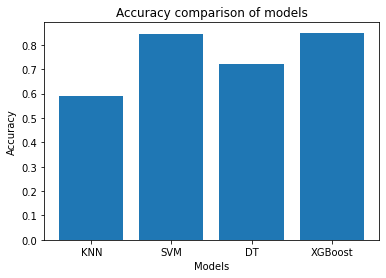

In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('book_partitions3.csv')

# Convert the text data into a tf-idf representation
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(df['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['label'], test_size=0.2)

# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print('knn_accuracy',knn_accuracy)
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('dt_accuracy',dt_accuracy)
# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('svm_accuracy',svm_accuracy)

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('xgb_accuracy=',xgb_accuracy)
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# BOW TEST 

In [56]:
from nltk.metrics.scores import precision
# Load the dataset
df = pd.read_csv("book_partitions3.csv")
# Convert text to a bag of words representation
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(df['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['label'], test_size=0.2)

# Train and evaluate the efficiency of each model
models = [
    #MultinomialNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    #GradientBoostingRegressor(),
]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred,average=None)
    print(f"Precision of {model.__class__.__name__}: {precision}")

    recall = recall_score(y_test, y_pred,average=None)
    print(f"Recall score of {model.__class__.__name__}: {recall}")

    Fscore = f1_score(y_test, y_pred,average=None)
    print(f"F_score of {model.__class__.__name__}: {Fscore}")
    print("--------------------------------------------------------------")
    #print(f"Precision of {model.__class__.__name__}: {precision:.2f}")

Accuracy of SVC: 0.83
Precision of SVC: [0.80851064 0.84615385 0.68292683 0.925      0.93939394]
Recall score of SVC: [0.80851064 0.73333333 0.90322581 0.88095238 0.88571429]
F_score of SVC: [0.80851064 0.78571429 0.77777778 0.90243902 0.91176471]
--------------------------------------------------------------
Accuracy of DecisionTreeClassifier: 0.69
Precision of DecisionTreeClassifier: [0.66       0.5106383  0.73333333 0.73684211 0.85714286]
Recall score of DecisionTreeClassifier: [0.70212766 0.53333333 0.70967742 0.66666667 0.85714286]
F_score of DecisionTreeClassifier: [0.68041237 0.52173913 0.72131148 0.7        0.85714286]
--------------------------------------------------------------
Accuracy of RandomForestClassifier: 0.86
Precision of RandomForestClassifier: [0.75925926 0.90909091 0.79411765 0.93181818 0.94285714]
Recall score of RandomForestClassifier: [0.87234043 0.66666667 0.87096774 0.97619048 0.94285714]
F_score of RandomForestClassifier: [0.81188119 0.76923077 0.83076923 0

# ***TF-IDF***

knn_accuracy 0.865
dt_accuracy 0.61
svm_accuracy 0.885
xgb_accuracy= 0.835


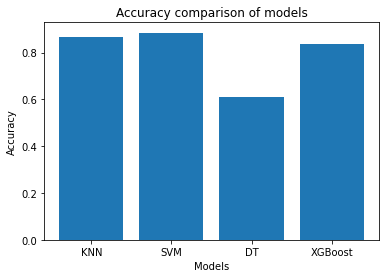

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('book_partitions3.csv')

# Convert the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['label'], test_size=0.2, random_state=42)

# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print('knn_accuracy',knn_accuracy)
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('dt_accuracy',dt_accuracy)
# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print('svm_accuracy',svm_accuracy)

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print('xgb_accuracy=',xgb_accuracy)
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

testBut not precisely so For nothing was this man more remarkable than for a certain impersonal stolidity as it were impersonal I say for it so shaded off into the surrounding infinite of things that it seemed one with the general stolidity discernible in the whole visible world which while pauselessly active in uncounted modes still eternally holds its peace and ignores you though you dig foundations for cathedrals Yet was this halfhorrible stolidity in him involving too as it appeared an allramifying heartlessness


In [35]:
svm_pred = svm.predict(X_test)
print("SVM_Prediction_Test =")
print( svm_pred)

SVM_Prediction_Test =
['c' 'b' 'd' 'd' 'c' 'd' 'd' 'c' 'e' 'a' 'e' 'a' 'd' 'e' 'e' 'e' 'd' 'e'
 'd' 'b' 'c' 'a' 'b' 'c' 'b' 'b' 'a' 'e' 'e' 'a' 'b' 'a' 'd' 'c' 'b' 'a'
 'd' 'c' 'e' 'a' 'b' 'a' 'b' 'e' 'b' 'b' 'e' 'd' 'a' 'e' 'c' 'e' 'b' 'c'
 'a' 'a' 'd' 'a' 'b' 'e' 'd' 'a' 'c' 'b' 'd' 'd' 'd' 'e' 'a' 'c' 'a' 'c'
 'c' 'd' 'b' 'b' 'd' 'a' 'b' 'b' 'd' 'a' 'b' 'a' 'b' 'c' 'e' 'd' 'd' 'b'
 'b' 'c' 'c' 'c' 'd' 'a' 'd' 'a' 'a' 'e' 'd' 'b' 'e' 'b' 'd' 'd' 'c' 'e'
 'a' 'a' 'a' 'e' 'e' 'e' 'a' 'c' 'a' 'e' 'c' 'd' 'e' 'c' 'd' 'b' 'b' 'c'
 'c' 'c' 'e' 'e' 'c' 'e' 'b' 'e' 'c' 'a' 'a' 'a' 'a' 'c' 'a' 'b' 'd' 'b'
 'e' 'a' 'e' 'b' 'e' 'a' 'a' 'a' 'e' 'a' 'e' 'c' 'a' 'd' 'a' 'a' 'c' 'd'
 'd' 'b' 'e' 'd' 'b' 'd' 'b' 'b' 'b' 'c' 'a' 'e' 'c' 'd' 'b' 'b' 'e' 'd'
 'c' 'b' 'b' 'c' 'e' 'a' 'b' 'b' 'e' 'd' 'e' 'e' 'd' 'a' 'b' 'c' 'b' 'b'
 'd' 'b']


In [9]:
print(accuracies)

[0.865, 0.885, 0.835]


# ***N-GRAM***

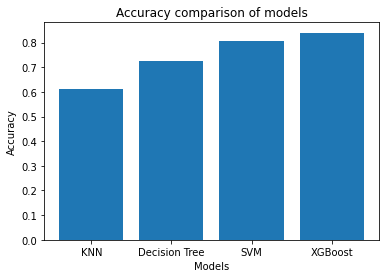

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('book_partitions3.csv')

# Convert the text data into a n-gram representation
vectorizer = CountVectorizer(ngram_range=(1, 2))
ngrams = vectorizer.fit_transform(df['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ngrams, df['label'], test_size=0.2, random_state=42)

# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Plot the accuracy comparison of the models
models = ['KNN', 'Decision Tree', 'SVM', 'XGBoost']
accuracies = [knn_accuracy, dt_accuracy, svm_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

In [12]:
svm_pred = svm.predict(X_test)
print(svm_pred)
print(accuracies)

['c' 'b' 'd' 'd' 'c' 'd' 'd' 'c' 'e' 'a' 'e' 'a' 'd' 'e' 'e' 'a' 'd' 'e'
 'd' 'b' 'b' 'a' 'b' 'c' 'b' 'b' 'b' 'e' 'e' 'a' 'a' 'a' 'd' 'c' 'b' 'a'
 'd' 'c' 'e' 'a' 'b' 'a' 'b' 'e' 'b' 'b' 'e' 'd' 'c' 'a' 'c' 'c' 'd' 'c'
 'a' 'a' 'd' 'a' 'b' 'e' 'd' 'a' 'c' 'b' 'd' 'd' 'd' 'e' 'a' 'c' 'a' 'c'
 'c' 'd' 'b' 'b' 'd' 'a' 'b' 'b' 'd' 'a' 'b' 'a' 'b' 'c' 'e' 'd' 'd' 'b'
 'b' 'c' 'c' 'c' 'd' 'a' 'd' 'a' 'a' 'e' 'd' 'a' 'e' 'e' 'd' 'd' 'c' 'a'
 'a' 'a' 'a' 'e' 'e' 'e' 'a' 'c' 'a' 'a' 'c' 'd' 'e' 'c' 'd' 'd' 'c' 'c'
 'c' 'c' 'e' 'e' 'c' 'e' 'b' 'e' 'c' 'a' 'a' 'a' 'a' 'c' 'e' 'b' 'd' 'b'
 'e' 'a' 'e' 'b' 'e' 'a' 'a' 'a' 'e' 'a' 'e' 'c' 'a' 'd' 'a' 'a' 'c' 'd'
 'd' 'b' 'e' 'd' 'b' 'd' 'b' 'b' 'b' 'c' 'a' 'e' 'c' 'd' 'b' 'b' 'e' 'd'
 'a' 'b' 'b' 'c' 'e' 'a' 'b' 'b' 'e' 'd' 'e' 'e' 'd' 'a' 'e' 'c' 'a' 'b'
 'd' 'b']
[0.61, 0.725, 0.805, 0.84]
